In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

from scripts.lstm_input import get_mel_spectrograms

2025-02-25 20:53:32.652435: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-25 20:53:32.674477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-25 20:53:32.681710: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 20:53:32.696751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
audio, _ = librosa.load('/var/data/apnea/datasets/new_mic_dataset/1/00001000-100507_13.wav', sr=16000)

spectrograms = get_mel_spectrograms(audio)

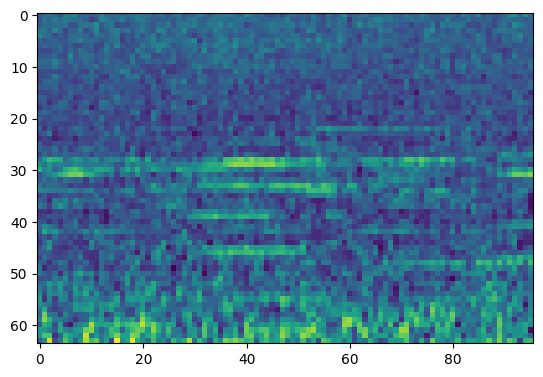

In [42]:
img_transposed = np.flip(np.transpose(spectrograms[0], (1, 0, 2)), axis=0)

plt.imshow(img_transposed)

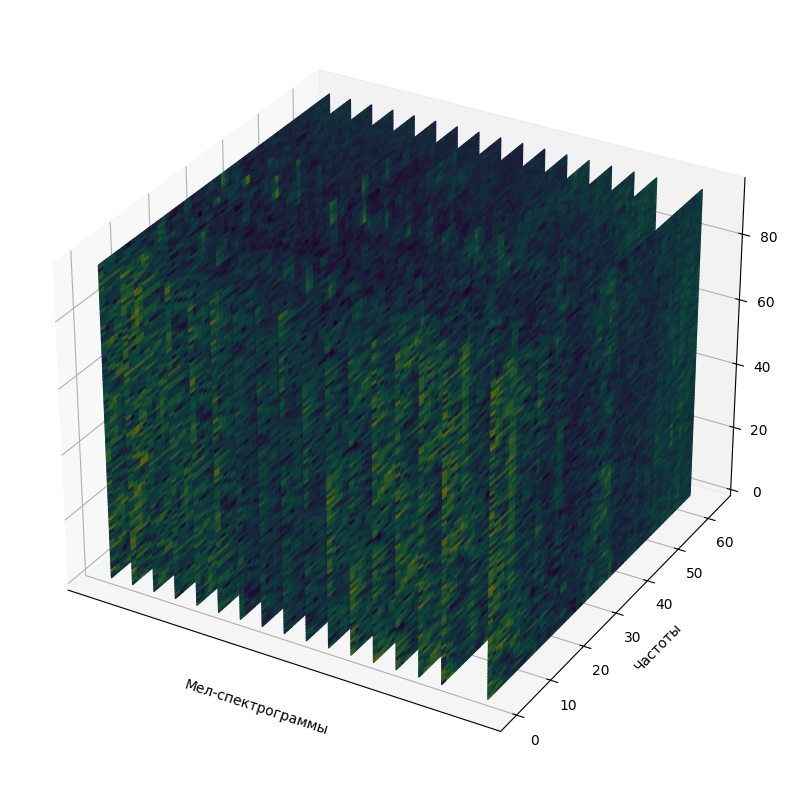

In [ ]:
def normalize_spectrogram(spec):
    return (spec - np.min(spec)) / (np.max(spec) - np.min(spec))

num_images = 17
spectrograms = [normalize_spectrogram(spec) for spec in spectrograms]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

x_offset = np.linspace(0, num_images, num_images)

for i, (spec, x) in enumerate(zip(spectrograms, x_offset)):
    y, z = np.meshgrid(range(spec.shape[1]), range(spec.shape[0]))
    x_mat = np.full_like(y, x)

    ax.plot_surface(x_mat, y, z, facecolors=plt.cm.viridis(spec), rstride=1, cstride=1)

ax.set_xticks([])
#ax.set_yticks([])
ax.set_xlabel("Мел-спектрограммы")
ax.set_ylabel("Частоты")

plt.show()


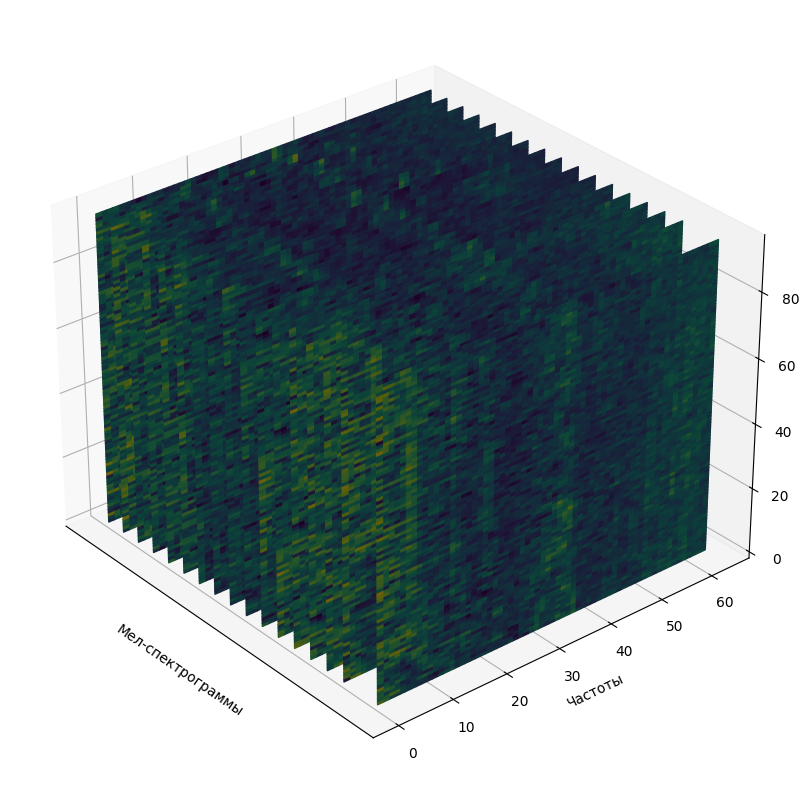

In [5]:
def normalize_spectrogram(spec):
    return (spec - np.min(spec)) / (np.max(spec) - np.min(spec))

num_images = 17
spectrograms = [normalize_spectrogram(spec) for spec in spectrograms]

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

x_offset = np.linspace(0, num_images, num_images)

for i, (spec, x) in enumerate(zip(spectrograms, x_offset)):
    y, z = np.meshgrid(range(spec.shape[1]), range(spec.shape[0]))
    x_mat = np.full_like(y, x)

    ax.plot_surface(x_mat, y, z, facecolors=plt.cm.viridis(spec), rstride=1, cstride=1)

ax.view_init(elev=30, azim=-40) 

ax.set_xticks([])
ax.set_xlabel("Мел-спектрограммы")
ax.set_ylabel("Частоты")

plt.show()

In [7]:
big_audio, _ = librosa.load('/var/data/apnea/edf_channels/mic/00001006-100507/00001006-100507%5B001%5D.wav', sr=16000)

/tmp/ipykernel_702394/2262529349.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


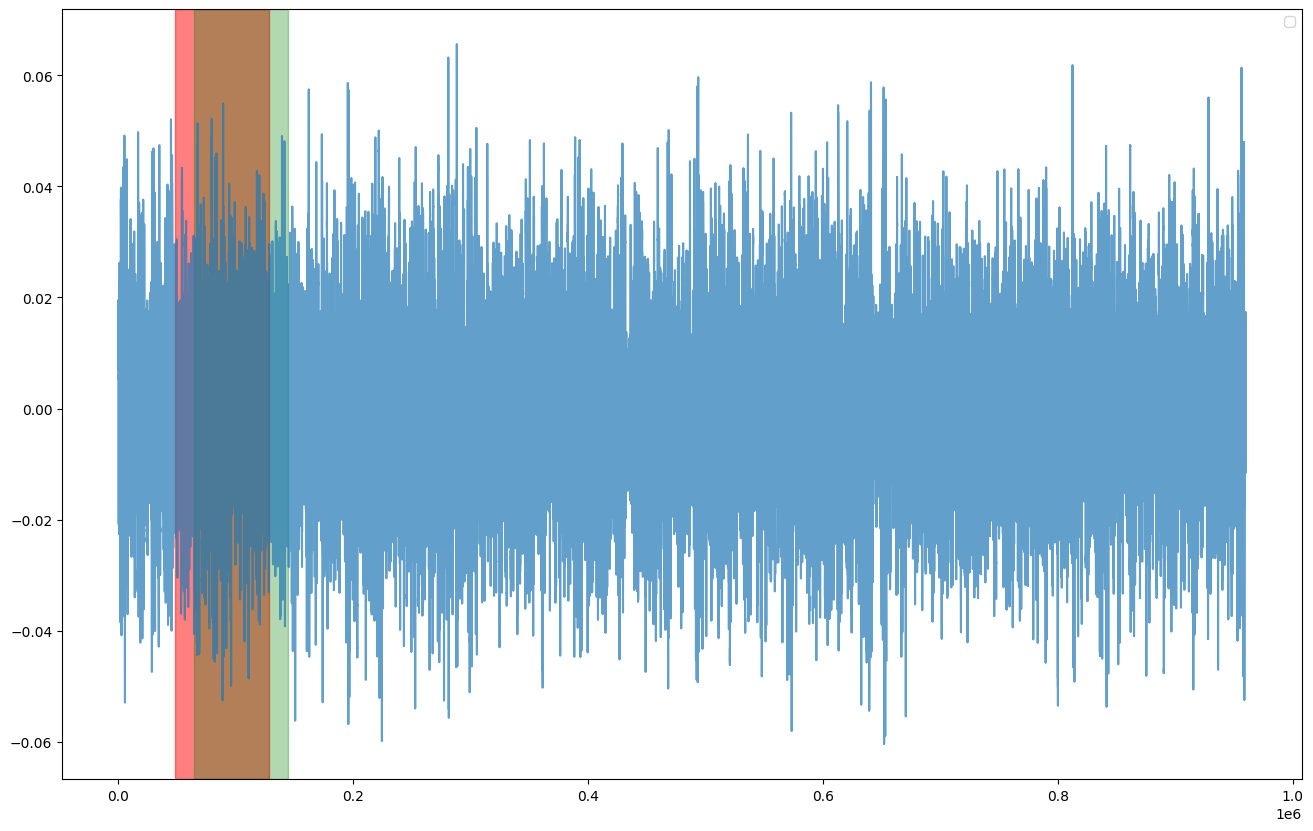

In [9]:
sr = 16000
x = np.arange(len(big_audio))


fig, ax = plt.subplots(figsize=(16, 10))

ax.axvspan(sr*3, sr*8, color='red', alpha=0.5)
ax.axvspan(sr*4, sr*9, color='green', alpha=0.3)
plt.plot(big_audio[:sr*60], zorder=2, alpha = 0.7)

ax.legend()
plt.show()


In [1]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

model_path = '/var/data/apnea/src/vggish/vggish_model.keras'
model = load_model(model_path)

# Визуализация и сохранение в файл
plot_model(model, to_file="vggish_model.png", show_shapes=False, show_layer_names=True)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.read_edf import get_channel, pyedflib_get_channels

channels = ['Mic', 'Tracheal', 'Snore', 'PulseRate', 'Effort THO']
channels_id = [18, 19, 10, 17, 13]

data = {}
for i in range(len(channels)):
    data[channels[i]] = pyedflib_get_channels('/var/data/apnea/datasets/edf/00001000-100507%5B001%5D.edf', channel_id=channels_id[i])

In [ ]:
fig, axes = plt.subplots(len(channels), 1, figsize=(12, 10), sharex=False)
fig.suptitle('PSG-Audio: A Fully Annotated Dataset with audio recordings', fontsize=16, y=0.95)

limited_channels = [0, 1, 2]
#colors = [(127, 255, 212), (152, 251, 152), (30, 144, 255), (255, 127, 80), (238, 130, 238)]
colors = ["#4682B4", "#98FB98", "#1E90FF", "#FF7F50", "#EE82EE"]

for i, channel in enumerate(channels):
    if i ==2:
        axes[i].plot(data[channel], color=colors[i], linewidth=1)
    else:
        axes[i].plot(data[channel], color=colors[i], linewidth=3)
    axes[i].set_ylabel(channel, rotation=0, labelpad=30, fontsize=12, va='center')
    axes[i].set_yticks([])
    axes[i].set_xticks([])  
    axes[i].grid(False)  
    if i not in limited_channels:
        axes[i].set_xlim(0, 3600)


for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.subplots_adjust(hspace=0.1)

plt.savefig("dataset_plot.png", dpi=300, bbox_inches='tight')

plt.show()